# **Import Library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Memuat Dataset**

In [2]:
transaksi = pd.read_csv("https://raw.githubusercontent.com/yovelakalista23/BMLP/refs/heads/main/dataset/bank_transactions_data_2.csv")
transaksi.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **EDA (Exploratory Data Analysis)**

### **Memahami Struktur Data**

In [3]:
transaksi.shape

(2512, 16)

- Dataset terdiri dari 2512 baris dan 16 kolom

In [4]:
transaksi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

Jenis data pada dataset ini terdiri dari 2, yaitu:

- Data Kategorikal (11 Kolom)= TransactionID, AccountID, TransactionDate, TransactionType, Location, DeviceID, IP Address, MerchantID, Channel, CustomerOccupation, PreviousTransactionDate

- Data Numerik (5 Kolom)= TransactionAmount, CustomerAge, TransactionDuration, LoginAttempts, AccountBalance

Karena Kolom TransactionDate dan PreviousTransactionDate tipe datanya masih string, kemudian diubah menjadi tipedata datetime supaya bisa dianalisis lebih lanjut.

In [5]:
transaksi.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [6]:
transaksi.isna().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


Tidak terdapat Missing Values

In [7]:
print("Number of Duplicates: ", transaksi.duplicated().sum())

Number of Duplicates:  0


Tidak terdapat Duplikat Data

## **Analisis Distribusi dan Korelasi**

In [8]:
transaksi[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']].describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


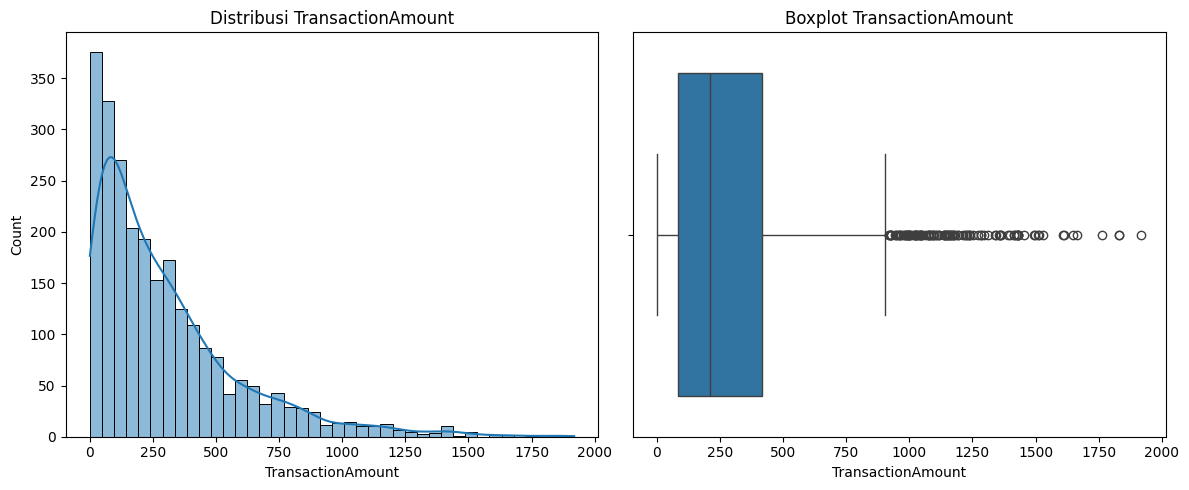

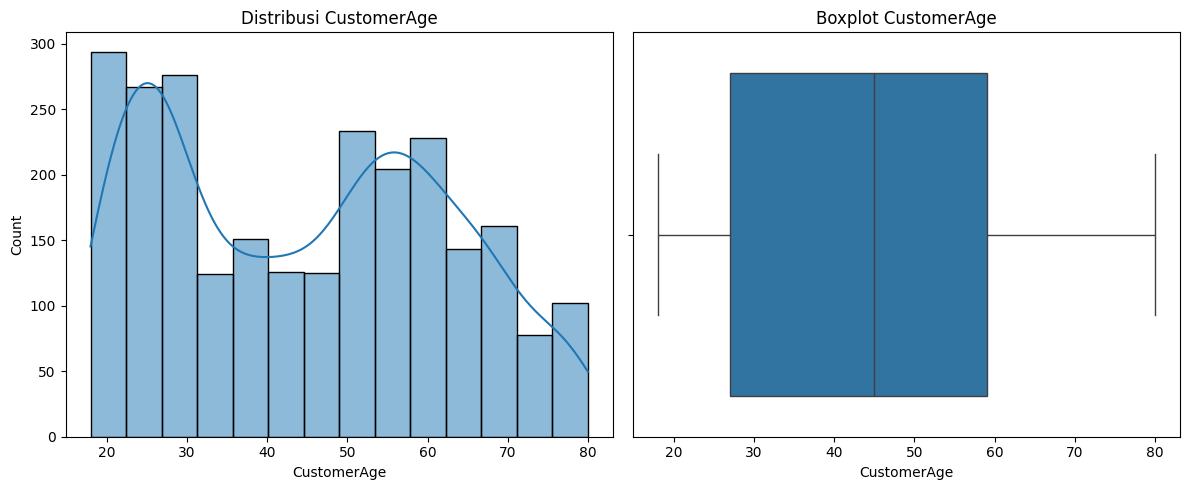

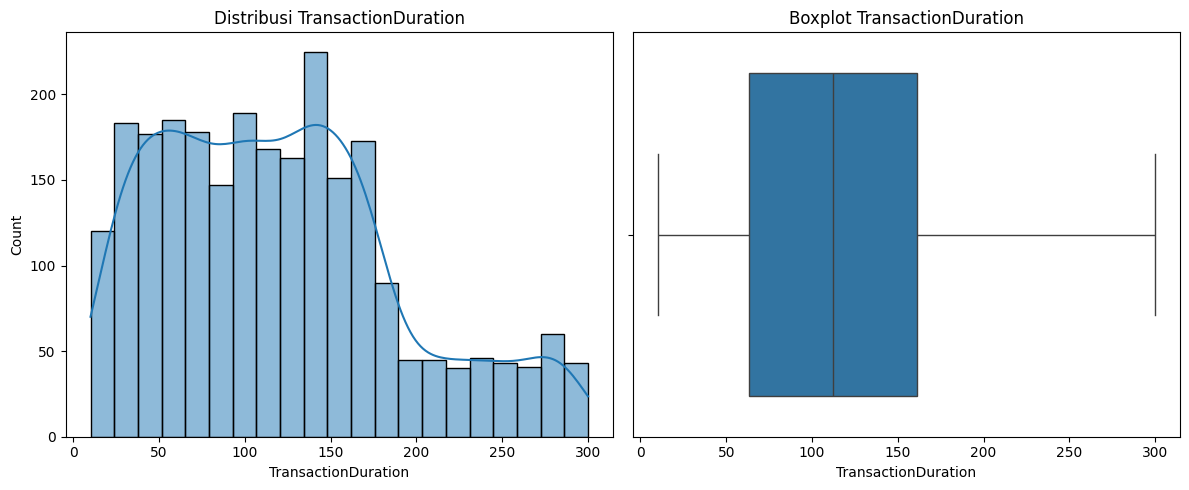

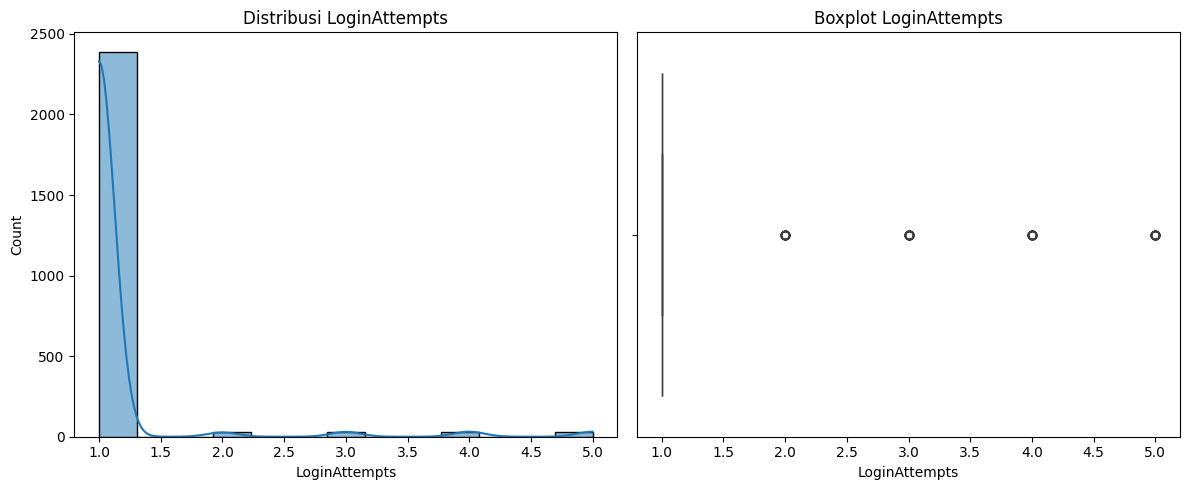

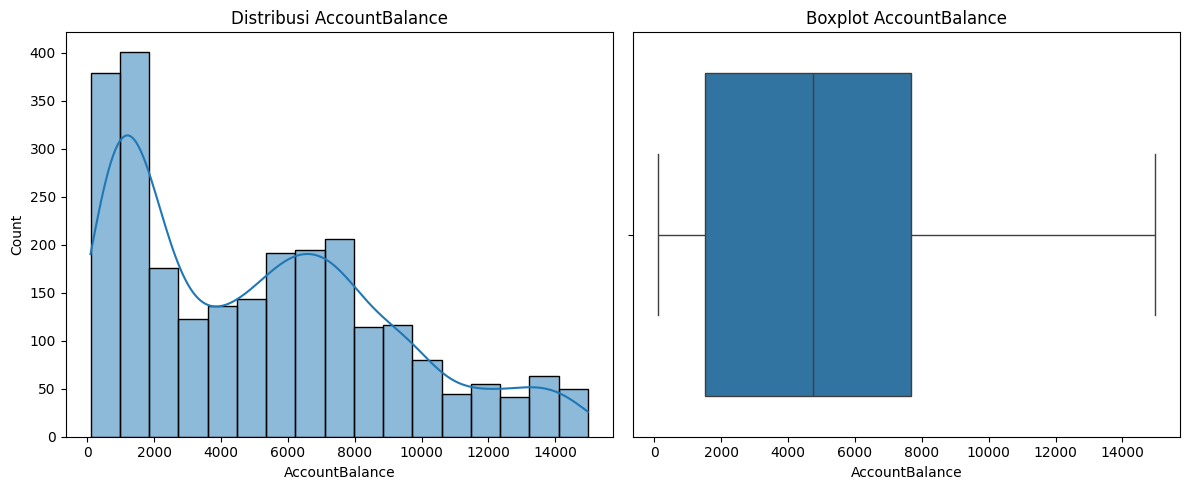

In [9]:
fitur_numerik = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

for fitur in fitur_numerik:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(transaksi[fitur], kde=True)
    plt.title(f'Distribusi {fitur}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=transaksi[fitur])
    plt.title(f'Boxplot {fitur}')

    plt.tight_layout()
    plt.show()

### **Analisis distribusi data numerik**

- TransactionAmount : Distribusinya bersifat right-skewed (miring ke kanan), lebih banyak transaksi kecil daripada transaksi besar.

- CustomerAge : Usia customer merata dengan puncak distribusi di usia 20-30 tahun dan 50-60 tahun

- TransactionDuration : Menunjukkan durasi transaksi lebih sering sekitar 100 detik dan maksimal 300 detik, bersifat right-skewed

- LoginAttempts : Sebagian besar customer hanya melakukan login sebanyak 1 kali

- AccountBalance : Sebagian besar customer memiliki saldo hanya sekitar 0-8000, sedikit bersifat right-skewed

right-skewed: banyak angka numpuk di angka kecil, tetapi ada sedikit data yang nilainya jauh lebih besar.

**Kesimpulannya** dataset ini menunjukkan distribusi yang tidak simetris. Kolom TransactionAmount, TransactionDuration, dan AccountBalance memiliki distribusi yang right-skewed, yang berarti sebagian besar transaksi berada pada nilai yang relatif kecil, namun terdapat beberapa nilai yang jauh lebih tinggi dari rata-rata (outlier). Hal ini bisa mengindikasikan adanya transaksi tidak biasa atau pengguna dengan saldo yang sangat besar.

Kemudian, kolom CustomerAge memiliki distribusi yang relatif simetris, menunjukkan penyebaran usia pelanggan yang merata. Sedangkan LoginAttempts cenderung left-skewed, karena sebagian besar pelanggan hanya melakukan satu kali percobaan login, meskipun ada sedikit yang mencoba lebih dari sekali.



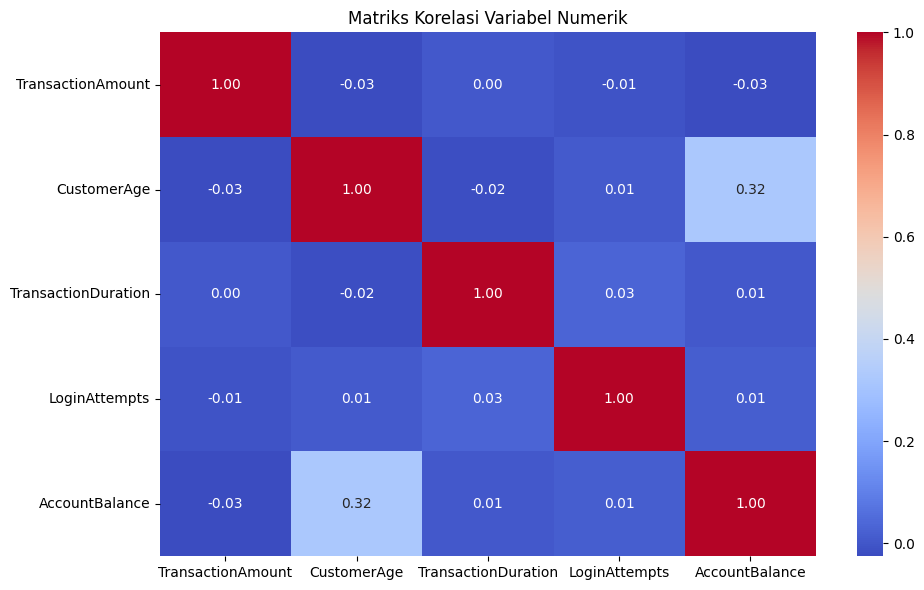

In [10]:
# Daftar kolom numerik
numerik_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

# Hitung korelasi
korelasi = transaksi[numerik_cols].corr()

# Plot heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi Variabel Numerik")
plt.tight_layout()
plt.show()

- Hanya CustomerAge dan AccountBalance yang menunjukkan hubungan berarti (0.32).

**Kesimpulannya** Korelasi yang paling menonjol ditemukan antara CustomerAge dan AccountBalance dengan nilai korelasi sebesar 0.32, mengindikasikan hubungan positif lemah: semakin tua usia pelanggan, cenderung semakin besar saldo akunnya. Tidak ditemukan korelasi kuat lainnya di antara variabel numerik.

### **Visualisasi Data**

<Figure size 1800x500 with 0 Axes>

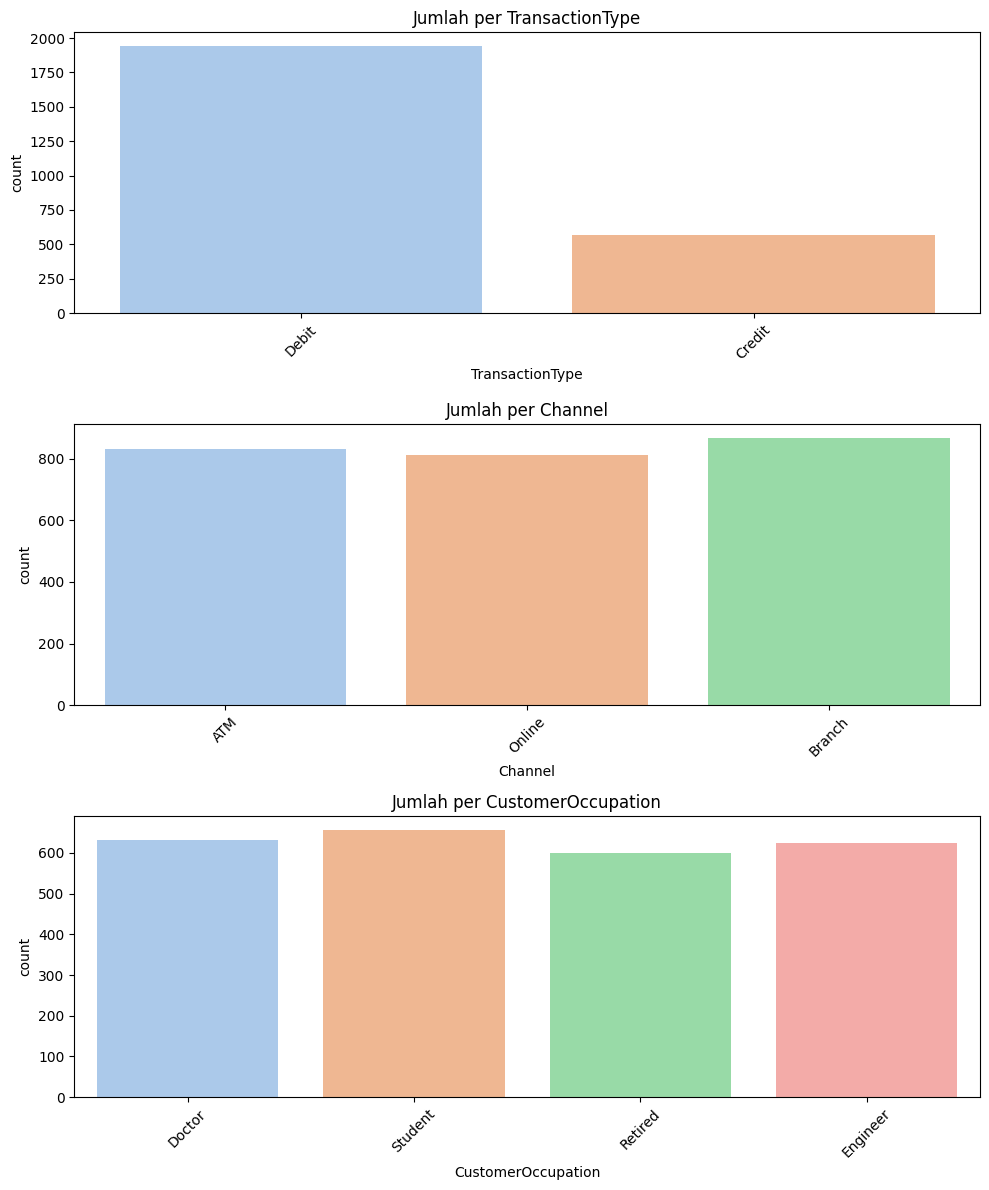

In [11]:
# List variabel kategorikal (contoh)
categorical_cols = ['TransactionType', 'Channel', 'CustomerOccupation']

# Plot bar chart
plt.figure(figsize=(18, 5))
plt.figure(figsize=(10, len(categorical_cols) * 4))
for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols), 1, i+1)
    sns.countplot(data=transaksi, x=col, hue=col, palette='pastel', legend=False)
    plt.title(f'Jumlah per {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Analisis Visualisasi Data Kategorikal:

Dari total 11 kolom kategorikal, hanya 3 kolom utama yang divisualisasikan, yaitu:

- TransactionType

- Channel

- CustomerOccupation

Alasan pemilihan 3 kolom ini:

- Kolom-kolom tersebut lebih relevan dalam memberikan gambaran pola transaksi nasabah.

- Sementara kolom lain seperti TransactionID, AccountID, DeviceID, IP Address, MerchantID, Location, PreviousTransactionDate, dll lebih bersifat unik untuk setiap transaksi (ID atau lokasi spesifik) sehingga kurang bermakna untuk analisis distribusi umum.

Penjelasan hasil grafik:

- TransactionType: Mayoritas transaksi adalah Debit, jauh lebih banyak dibandingkan Credit.

- Channel: Penggunaan channel ATM, Online, dan Branch hampir seimbang, dengan sedikit dominasi penggunaan Branch.

- CustomerOccupation: Sebaran profesi pelanggan cukup merata antara Student, Doctor, Retired, dan Engineer, dengan Student sedikit lebih dominan.

# **Data Preprocessing**

Tahapan-tahapan data preprocessing meliputi:

1. Normalisasi

2. Deteksi dan penanganan Outlier

3. Encoding

4. Binning


Dataset terdiri dari 16 kolom, tetapi hanya 8 kolom yang akan digunakan dalam proses clustering ini

In [12]:
# Misalkan dataset kamu sudah ada di variabel transaksi
# Pilih kolom yang relevan
relevant_columns = [
    'TransactionAmount', 'TransactionType', 'Channel', 'CustomerAge',
    'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance'
]

# Ambil hanya kolom yang relevan
transaksi_relevant = transaksi[relevant_columns]

# Cek apakah pemilihan kolom sudah benar
print(transaksi_relevant.head())


   TransactionAmount TransactionType Channel  CustomerAge CustomerOccupation  \
0              14.09           Debit     ATM           70             Doctor   
1             376.24           Debit     ATM           68             Doctor   
2             126.29           Debit  Online           19            Student   
3             184.50           Debit  Online           26            Student   
4              13.45          Credit  Online           26            Student   

   TransactionDuration  LoginAttempts  AccountBalance  
0                   81              1         5112.21  
1                  141              1        13758.91  
2                   56              1         1122.35  
3                   25              1         8569.06  
4                  198              1         7429.40  


In [13]:
transaksi_relevant.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,Debit,ATM,70,Doctor,81,1,5112.21
1,376.24,Debit,ATM,68,Doctor,141,1,13758.91
2,126.29,Debit,Online,19,Student,56,1,1122.35
3,184.50,Debit,Online,26,Student,25,1,8569.06
4,13.45,Credit,Online,26,Student,198,1,7429.40


## **Normalisasi**

Menormalisasikan pada data numerik yaitu TransactionAmount, CustomerAge, TransactionDuration, LoginAttempts, dan AccountBalance menggunakan StandardScaler

In [14]:
from sklearn.preprocessing import StandardScaler

# Pilih kolom numerik untuk dinormalisasi
numerical_columns = [
    'TransactionAmount', 'CustomerAge', 'TransactionDuration',
    'LoginAttempts', 'AccountBalance'
]

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Terapkan normalisasi pada kolom numerik
transaksi_relevant[numerical_columns] = scaler.fit_transform(transaksi_relevant[numerical_columns])

# Cek hasilnya
print(transaksi_relevant.head())


   TransactionAmount TransactionType Channel  CustomerAge CustomerOccupation  \
0          -0.971275           Debit     ATM     1.423718             Doctor   
1           0.269440           Debit     ATM     1.311287             Doctor   
2          -0.586882           Debit  Online    -1.443277            Student   
3          -0.387456           Debit  Online    -1.049768            Student   
4          -0.973468          Credit  Online    -1.049768            Student   

   TransactionDuration  LoginAttempts  AccountBalance  
0            -0.552443      -0.206794       -0.000537  
1             0.305314      -0.206794        2.216472  
2            -0.909842      -0.206794       -1.023534  
3            -1.353017      -0.206794        0.885797  
4             1.120184      -0.206794        0.593589  


<ipython-input-14-29c5e06aaa25>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaksi_relevant[numerical_columns] = scaler.fit_transform(transaksi_relevant[numerical_columns])


### **Deteksi dan menangani Outlier**

Karena data sudah dinormalisasi, jadi untuk menangani outlier menggunakan Z-Score

In [15]:
from scipy import stats

# Hitung z-score untuk kolom numerik
z_scores = np.abs(stats.zscore(transaksi_relevant[numerical_columns]))

# Tetapkan threshold, biasanya 3
threshold = 3

# Identifikasi baris yang tidak punya outlier (semua kolom < threshold)
filtered_entries = (z_scores < threshold).all(axis=1)

# Buat DataFrame baru tanpa outlier
transaksi_no_outliers = transaksi_relevant[filtered_entries]

print(f"Jumlah data awal: {len(transaksi_relevant)}")
print(f"Jumlah data setelah buang outlier: {len(transaksi_no_outliers)}")


Jumlah data awal: 2512
Jumlah data setelah buang outlier: 2372


Metode Z-Score membantu membersihkan data dari nilai-nilai ekstrem yang dapat mengganggu proses analisis atau pelatihan model. Dengan threshold ±3, kita berhasil menghapus 140 outlier dan meningkatkan kualitas data untuk proses clustering

### **Encoding**

In [16]:
# Pakai One-Hot Encoding
import pandas as pd

# List kolom kategorikal
categorical_columns = ['TransactionType', 'Channel', 'CustomerOccupation']

# One-Hot Encoding
transaksi_encoded = pd.get_dummies(transaksi_no_outliers, columns=categorical_columns, dtype= int)

# Cek hasil
print(transaksi_encoded.head())


   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0          -0.971275     1.423718            -0.552443      -0.206794   
1           0.269440     1.311287             0.305314      -0.206794   
2          -0.586882    -1.443277            -0.909842      -0.206794   
3          -0.387456    -1.049768            -1.353017      -0.206794   
4          -0.973468    -1.049768             1.120184      -0.206794   

   AccountBalance  TransactionType_Credit  TransactionType_Debit  Channel_ATM  \
0       -0.000537                       0                      1            1   
1        2.216472                       0                      1            1   
2       -1.023534                       0                      1            0   
3        0.885797                       0                      1            0   
4        0.593589                       1                      0            0   

   Channel_Branch  Channel_Online  CustomerOccupation_Doctor  \
0         

Pakai pd.get_dummies + pecah Debit/Credit supaya semua fitur berbentuk angka, bebas dari asumsi urutan, dan bikin model clustering bekerja dengan lebih akurat dan fair.

### **Binning (Pengelompokkan Data)**

In [17]:
transaksi_binned = transaksi_encoded.copy()

# Binning untuk TransactionAmount
bins_amount = [-float('inf'), -0.5, 0.5, float('inf')]  # Kecil, Sedang, Besar
labels_amount = ['Kecil', 'Sedang', 'Besar']
transaksi_binned['AmountGroup'] = pd.cut(transaksi_binned['TransactionAmount'], bins=bins_amount, labels=labels_amount)

# Binning untuk CustomerAge
bins_age = [-float('inf'), 0, 1, float('inf')]  # Muda, Dewasa, Tua
labels_age = ['Muda', 'Dewasa', 'Tua']
transaksi_binned['AgeGroup'] = pd.cut(transaksi_binned['CustomerAge'], bins=bins_age, labels=labels_age)

# Binning untuk TransactionDuration
bins_duration = [-float('inf'), 0, 1, float('inf')]  # Cepat, Sedang, Lama
labels_duration = ['Cepat', 'Sedang', 'Lama']
transaksi_binned['DurationGroup'] = pd.cut(transaksi_binned['TransactionDuration'], bins=bins_duration, labels=labels_duration)

# Binning untuk AccountBalance
bins_balance = [-float('inf'), 0, 1, float('inf')]  # Rendah, Sedang, Tinggi
labels_balance = ['Rendah', 'Sedang', 'Tinggi']
transaksi_binned['BalanceGroup'] = pd.cut(transaksi_binned['AccountBalance'], bins=bins_balance, labels=labels_balance)

# Menampilkan hasil binning
transaksi_binned[['TransactionAmount', 'AmountGroup', 'CustomerAge', 'AgeGroup',
                   'TransactionDuration', 'DurationGroup', 'AccountBalance', 'BalanceGroup']].head()

,TransactionAmount,AmountGroup,CustomerAge,AgeGroup,TransactionDuration,DurationGroup,AccountBalance,BalanceGroup
0,-0.971275,Kecil,1.423718,Tua,-0.552443,Cepat,-0.000537,Rendah
1,0.269440,Sedang,1.311287,Tua,0.305314,Sedang,2.216472,Tinggi
2,-0.586882,Kecil,-1.443277,Muda,-0.909842,Cepat,-1.023534,Rendah
3,-0.387456,Sedang,-1.049768,Muda,-1.353017,Cepat,0.885797,Sedang
4,-0.973468,Kecil,-1.049768,Muda,1.120184,Lama,0.593589,Sedang


In [18]:
print(transaksi_binned[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance']].describe())


       TransactionAmount  CustomerAge  TransactionDuration  AccountBalance
count        2372.000000  2372.000000          2372.000000     2372.000000
mean           -0.069462     0.005744            -0.009317       -0.001111
std             0.857947     0.998459             0.998568        0.996063
min            -1.018657    -1.499493            -1.567456       -1.285344
25%            -0.746266    -0.993553            -0.809771       -0.924363
50%            -0.312581     0.018328            -0.123564       -0.096301
75%             0.329240     0.805347             0.591234        0.647841
max             2.987433     1.985874             2.578372        2.529043


In [19]:
transaksi_binned.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student,AmountGroup,AgeGroup,DurationGroup,BalanceGroup
0,-0.971275,1.423718,-0.552443,-0.206794,-0.000537,0,1,1,0,0,1,0,0,0,Kecil,Tua,Cepat,Rendah
1,0.269440,1.311287,0.305314,-0.206794,2.216472,0,1,1,0,0,1,0,0,0,Sedang,Tua,Sedang,Tinggi
2,-0.586882,-1.443277,-0.909842,-0.206794,-1.023534,0,1,0,0,1,0,0,0,1,Kecil,Muda,Cepat,Rendah
3,-0.387456,-1.049768,-1.353017,-0.206794,0.885797,0,1,0,0,1,0,0,0,1,Sedang,Muda,Cepat,Sedang
4,-0.973468,-1.049768,1.120184,-0.206794,0.593589,1,0,0,0,1,0,0,0,1,Kecil,Muda,Lama,Sedang


# **Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

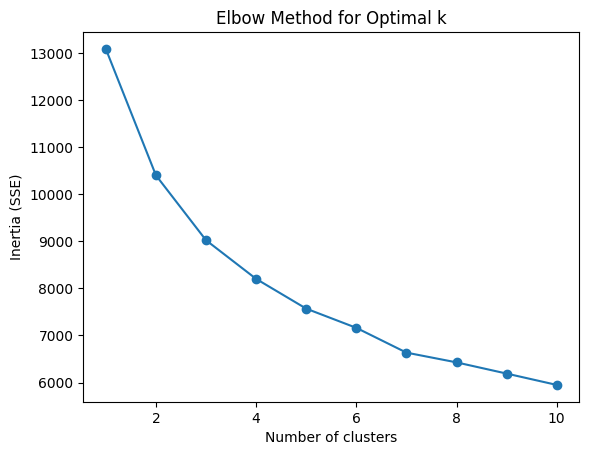

   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0          -0.971275     1.423718            -0.552443      -0.206794   
1           0.269440     1.311287             0.305314      -0.206794   
2          -0.586882    -1.443277            -0.909842      -0.206794   
3          -0.387456    -1.049768            -1.353017      -0.206794   
4          -0.973468    -1.049768             1.120184      -0.206794   

   AccountBalance  TransactionType_Credit  TransactionType_Debit  Channel_ATM  \
0       -0.000537                       0                      1            1   
1        2.216472                       0                      1            1   
2       -1.023534                       0                      1            0   
3        0.885797                       0                      1            0   
4        0.593589                       1                      0            0   

   Channel_Branch  Channel_Online  CustomerOccupation_Doctor  \
0         

In [20]:
from sklearn.cluster import KMeans

# Misal pakai hanya fitur numerik dan hasil encoding
features = transaksi_encoded[['TransactionAmount', 'CustomerAge', 'TransactionDuration',
                               'LoginAttempts', 'AccountBalance',
                               'TransactionType_Credit', 'TransactionType_Debit',
                               'Channel_ATM', 'Channel_Branch', 'Channel_Online',
                               'CustomerOccupation_Doctor', 'CustomerOccupation_Engineer',
                               'CustomerOccupation_Retired', 'CustomerOccupation_Student']]

# 1. Menentukan jumlah cluster pakai Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()

# 2. Setelah lihat grafik dan pilih k (misal k=3)
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(features)

# 3. Tambahkan hasil cluster ke dataset
transaksi_encoded['Cluster'] = clusters

# 4. Cek hasil
print(transaksi_encoded.head())


Pada tahap ini, dilakukan pembuatan model clustering awal menggunakan algoritma KMeans. Model ini bertujuan untuk melihat bagaimana data dapat dikelompokkan berdasarkan fitur-fitur yang tersedia, tanpa menentukan jumlah cluster optimal terlebih dahulu.

Model ini digunakan sebagai percobaan awal untuk melihat hasil pengelompokan data, sebelum dilakukan evaluasi untuk menentukan jumlah cluster yang paling optimal.

### **b. Evaluasi Model Clustering**

In [21]:
# Membangun Model Final Clustering

# Misal dari evaluasi, k terbaik adalah 3
optimal_k = 3

# Buat model KMeans
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
transaksi_encoded['Cluster'] = kmeans_final.fit_predict(features)

# Cek hasil cluster
print(transaksi_encoded.head())

# Opsional: Cek jumlah data per cluster
print(transaksi_encoded['Cluster'].value_counts())


   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0          -0.971275     1.423718            -0.552443      -0.206794   
1           0.269440     1.311287             0.305314      -0.206794   
2          -0.586882    -1.443277            -0.909842      -0.206794   
3          -0.387456    -1.049768            -1.353017      -0.206794   
4          -0.973468    -1.049768             1.120184      -0.206794   

   AccountBalance  TransactionType_Credit  TransactionType_Debit  Channel_ATM  \
0       -0.000537                       0                      1            1   
1        2.216472                       0                      1            1   
2       -1.023534                       0                      1            0   
3        0.885797                       0                      1            0   
4        0.593589                       1                      0            0   

   Channel_Branch  Channel_Online  CustomerOccupation_Doctor  \
0         

Setelah model clustering awal dibuat, dilakukan evaluasi untuk menentukan jumlah cluster yang optimal.

Dua metode digunakan dalam evaluasi ini:

Elbow Method: Untuk melihat titik "tekukan" dari grafik inertia, yang menunjukkan jumlah cluster yang baik.

Silhouette Score: Untuk mengukur seberapa baik setiap data point berada di dalam clusternya masing-masing (semakin mendekati 1 semakin baik).

Hasil evaluasi ini akan digunakan untuk membangun model clustering yang lebih optimal.

### **Visualisasi Hasil Clustering**

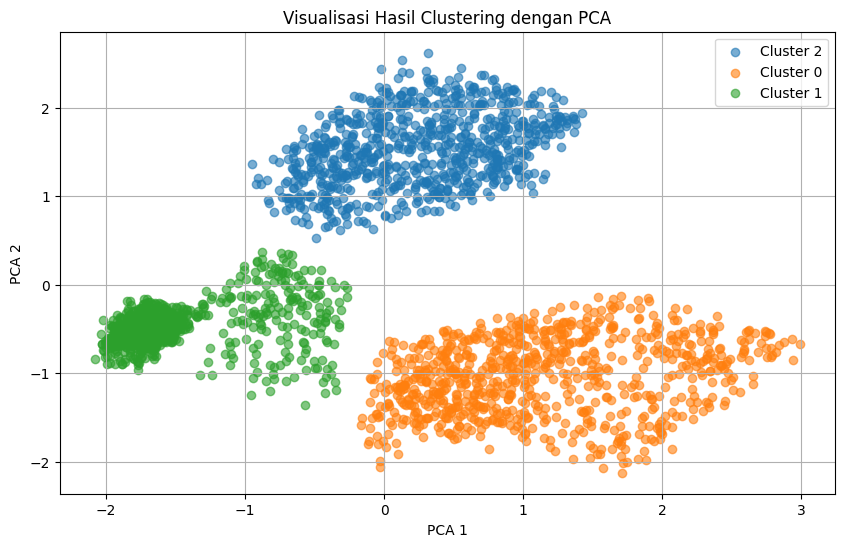

In [23]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Drop kolom non-numerik untuk visualisasi (seperti 'AgeGroup', dst)
X_numeric = transaksi_encoded.copy()

# Lakukan PCA untuk mereduksi ke 2 dimensi
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_numeric)

# Tambahkan hasil PCA ke DataFrame
transaksi_encoded['PCA1'] = pca_result[:, 0]
transaksi_encoded['PCA2'] = pca_result[:, 1]

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
for cluster in transaksi_encoded['Cluster'].unique():
    subset = transaksi_encoded[transaksi_encoded['Cluster'] == cluster]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {cluster}', alpha=0.6)

plt.title('Visualisasi Hasil Clustering dengan PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
from sklearn.cluster import KMeans

# Buat model KMeans baru dengan jumlah cluster optimal
kmeans_model = KMeans(n_clusters=3, random_state=42)

# Fit model ke data kamu
kmeans_model.fit(transaksi_encoded)


KMeans(n_clusters=3, random_state=42)

### **e. Analisis dan Interpretasi Hasil Cluster**


**1. Tambahkan label cluster ke Dataframe**

In [25]:
transaksi_encoded['Cluster'] = kmeans_model.labels_

**2. Inverse data jika melakukan Standarisasi/Normalisasi**

In [26]:
# Inverse transform data numerik
transaksi_encoded[numerical_columns] = scaler.inverse_transform(transaksi_encoded[numerical_columns])

# Cek hasilnya
print(transaksi_encoded[numerical_columns].head())


   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0              14.09         70.0                 81.0            1.0   
1             376.24         68.0                141.0            1.0   
2             126.29         19.0                 56.0            1.0   
3             184.50         26.0                 25.0            1.0   
4              13.45         26.0                198.0            1.0   

   AccountBalance  
0         5112.21  
1        13758.91  
2         1122.35  
3         8569.06  
4         7429.40  


In [27]:
# Group by Cluster dan hitung rata-rata setiap fitur numerik
cluster_summary = transaksi_encoded.groupby('Cluster')[numerical_columns].mean()

# Lihat hasilnya
print(cluster_summary)


         TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
Cluster                                                                       
0               263.685172    45.497543           120.765356       1.012285   
1               280.932438    25.670143           121.065189       1.009126   
2               287.844450    62.560051           115.155499       1.011378   

         AccountBalance  
Cluster                  
0           9329.261106  
1           1602.338814  
2           4169.203894  


# **Analisis Karakteristik Cluster dari Model KMeans**

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## **Cluster 1:**

- Rata-rata Transaction Amount: 263.69

- Rata-rata Customer Age: 45.5 Tahun

- Rata-rata Transaction Duration: 120.77 detik

- Rata-rata Login Attempts: 1 kali

- Rata-rata Account Balance: 9,329.26

Analisis: Cluster ini berisi pelanggan usia paruh baya (sekitar 45 tahun) dengan saldo akun yang cukup besar.
Nilai transaksi mereka juga moderat. Mereka kemungkinan pelanggan loyal dan stabil dari sisi finansial. Cocok untuk ditargetkan dengan produk atau layanan up-selling.

## **Cluster 2:**

- Rata-rata Transaction Amount: 280.93

- Rata-rata Customer Age: 25.7 Tahun

- Rata Transaction Duration: 121.07 detik

- Rata-rata Login Attempts: 1 Kali

- Rata-rata Account Balance: 1,602.34

Analisis: Cluster ini berisi pelanggan muda (sekitar 25 tahun) dengan saldo akun rendah.
Mereka cukup aktif bertransaksi dengan jumlah yang lumayan besar. Targetkan mereka dengan promosi diskon atau paket bundling agar bisa meningkatkan loyalitas.



## **Cluster 3:**

- Rata-rata Transaction Amount: 287.84

- Rata-rata Customer Age: 62.6 Tahun

- Rata Transaction Duration: 115.16 detik

- Rata-rata Login Attempts: 1 Kali

- Rata-rata Account Balance: 4,169.20

Analisis: Cluster ini berisi pelanggan senior (sekitar 62 tahun) dengan saldo akun menengah.
Mereka memiliki nilai transaksi yang lebih tinggi dibanding cluster lain. Cocok untuk ditawarkan layanan berbasis kenyamanan atau loyalty rewards karena mereka mungkin mencari kepraktisan.

# **Mengeksport Data**

In [28]:
# Export hasil clustering
transaksi_encoded.to_csv('hasil_clustering.csv', index=False)